In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('Week_8_Q&A.csv')

In [24]:
 data.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


1.Descriptive Analysis

 Histogram

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

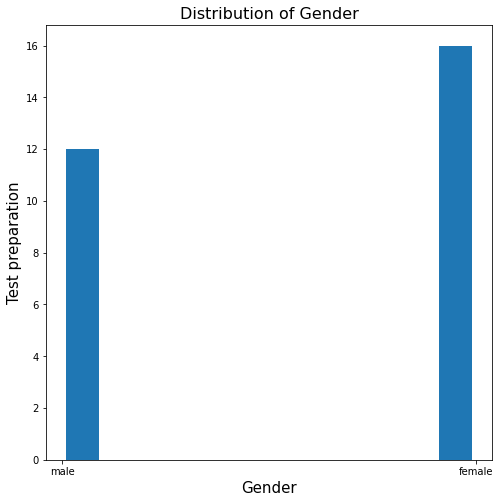

In [4]:
plt.figure(figsize=(8,8))
plt.hist(data['Gender'],rwidth=0.8)
plt.title('Distribution of Gender',fontsize=16)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Test preparation',fontsize=15)
plt.xticks()
plt.yticks()

In [5]:
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


From the above table it is clear that out of the 28 people in our data there exist 12 female and 16 male .The average of 
their total marks is 32 and having minimum score and maximum score as 12 and 50 respectively.

2. Check whether the female student and male student scored the same mark

H0:The female student and male student scored the same mark
H1:The female student and male student scored different mark


In [6]:
x=data['Gender']
scale=data['Total Marks']

In [7]:
x.value_counts()

female    16
male      12
Name: Gender, dtype: int64

In [8]:
cat1=x=='male'
cat2=x=='female'
cat1.head()

0     True
1    False
2    False
3    False
4    False
Name: Gender, dtype: bool

To perform the independent samples t-test we can use the 'ttest_ind' function from scipy.stats

In [10]:
from scipy.stats import ttest_ind

In [11]:
ttest_ind(cat1,cat2)

Ttest_indResult(statistic=-1.0606601717798212, pvalue=0.2935654028375021)

Here the value of T statistic is -1.060 which is less than the table value and the p value is obtained as 0.2935
which is less than 0.05 .So we reject the null hypothesis that male and female student scored the same mark and
accept the alternative hypothesis that they got different mark.

2.Whether the test preparation helps the students

H0:There is no association between Test preparation and Total marks
H1:There is association between Test preparation and Total marks

In [16]:
from scipy.stats import chi2_contingency

In [17]:
a=data['Test preparation']
b=data['Total Marks']

In [20]:
contingency=pd.crosstab(data['Gender'],a,b,aggfunc=sum)
contingency

Test preparation,completed,none
Gender,,
female,181,359
male,131,234


In [21]:
chi2, p, dof, expected=chi2_contingency(contingency)

In [22]:
print('The computed chi-square statistics is ',chi2)
print('The computed chi-square p-value is',p)
print('The expected cell counts are',expected)
print('The degrees of freedom are',dof)

The computed chi-square statistics is  0.4424783072568524
The computed chi-square p-value is 0.5059287011668497
The expected cell counts are [[186.16574586 353.83425414]
 [125.83425414 239.16574586]]
The degrees of freedom are 1


Since the critical value is greater than statistic we reject H0 ie,we accept the alternative that there is association between test preparation and total marks.